**Classifier 1:**

Accuracy: 0.25

Precision: 0.0625

Recall: 1

F1-Score: 0.1176


**Classifier 2:**

Accuracy: 0.93

Precision: 0.4

Recall: 0.8

F1-Score: 0.53

# Evaluating Classifiers

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

In [19]:
# Read the data
df = pd.read_csv('../train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.shape

(891, 11)

In [21]:
# Split the data into X and y
y = df['Survived']
X = df.iloc[:, 1:]

In [22]:
X.shape, y.shape

((891, 10), (891,))

In [23]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape

((712, 10), (179, 10))

In [27]:
y_train.shape, y_test.shape

((712,), (179,))

In [29]:
# Build the classifier
dummy_clf = DummyClassifier(strategy='most_frequent')

In [30]:
# Training the model with .fit(training_data)
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [31]:
dummy_clf.score(X_train, y_train)

0.6137640449438202

In [58]:
# After we fit our model with our training data our model can predict
# outcome values given some input data of the same type
dummy_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [32]:
# Build a simple logistic regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

In [70]:
df.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [71]:
# Feature Engineer
# Decide on which columns to include in your model
# Impute missing values of the age
# factorize sex
training_columns = ['Pclass', 'SibSp']

In [72]:
# Train your model with .fit(training_data)
lr_clf.fit(X_train[training_columns], y_train)

LogisticRegression()

In [73]:
lr_clf.score(X_train[training_columns], y_train)

0.6797752808988764

In [62]:
# Make predictions for input values
lr_clf.predict(X_test[['Pclass']])

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0])

In [65]:
# a coefficient that the model estimates
lr_clf.coef_

array([[-0.85920662]])

In [67]:
# b of the sigmoid function
lr_clf.intercept_

array([1.48569191])

In [75]:
# How to plot the sigmoid curve
def sigmoid(a, b, x):
    '''
    Calculate the value of the sigmoid function
    '''
    1 / (1 + np.exp(-b + a*x))

## 1) Accuracy

The first and easiest way to evaluate a classifier is the **accuracy**. It measures which ratio of the observations you classified correctly.

$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} 1(\hat{y}_i = y_i)$

where

$1(\hat{y}_i = y_i) = 
\begin{cases}
    1,& \text{if } \hat{y}_i = y_i\\
    0,              & \text{otherwise}
\end{cases}$

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred_dummy = dummy_clf.predict(X_train)

In [41]:
y_pred_lr = lr_clf.predict(X_train[['Pclass']])

In [43]:
accuracy_score(y_train, y_pred_dummy)

0.6137640449438202

In [44]:
accuracy_score(y_train, y_pred_lr)

0.6797752808988764

Is accuracy always a good metric to evaluate your classification?

- If the sample size of the different categories is very imbalanced, accuracy will naturally favor classifiers that just predict the majority class
- You may have different preferences for different types of missclassification. Accuracy does not tell you anything about the type of error you are making.

## 2) Types of Errors and the Confusion Matrix

**False Positive:**<br>
An observation is classified as positive, although it truly is negative

**False Negatives:**<br>
An observation is classified as negative, although it truly is positive

You can plot the different types of errors in a **confusion matrix**.

In [45]:
from sklearn.metrics import plot_confusion_matrix

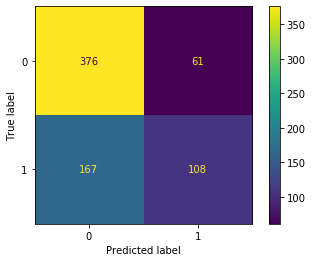

In [47]:
plot_confusion_matrix(lr_clf, X_train[['Pclass']], y_train)

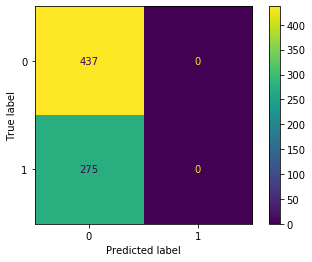

In [46]:
plot_confusion_matrix(dummy_clf, X_train, y_train)

## 3) Precision

$precision = \frac{TP}{TP + FP}$

In [48]:
from sklearn.metrics import precision_score

In [49]:
precision_score(y_train, y_pred_dummy)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [55]:
precision = precision_score(y_train, y_pred_lr)

## 4) Recall

$recall = \frac{TP}{TP + FN}$

In [51]:
from sklearn.metrics import recall_score

In [52]:
recall_score(y_train, y_pred_dummy)

0.0

In [54]:
recall = recall_score(y_train, y_pred_lr)

## 5) F1-Score

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

In [56]:
2 * (precision*recall)/(precision+recall)

0.48648648648648646